## Things need to have in the project:
1. Abstract
2. Introduce to Dataset
3. Conclusion if neccessary

# 1. Abstract
I found this dataset on speed dating on Kaggle and I was lucky to found a dataset that has been nicely set up in an csv/excel file. I want to look at this dataset to see if the norm about male and female are true. My goal for this project is to:


1. In what field that a person have a highest chance to have an attractive date?
2. Find out how importance appearance is in order to have a date.
3. What is the most desriable attribute of a male and a female?


In [415]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as lib
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import requests
import json
from ggplot import *

In [527]:
data=pd.read_excel("SpeedDatingData.xls")

In [529]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


The explaination for each column is include in the file SpeedDatingDataKey.doc. 


Each people in the dataset is identified by a specific iid number. They will be scored in 6 different categories, which are: 
1. Attractive (attr)
2. Intelligent (intel)
3. Sincere (sinc)
4. Fun (fun)
5. Ambitious (amb)
6. Shared hobbies /interest (shared).

To answer my questions, I mainly used these categorries.
The point that they have under each categories are the points that their dates gave them. Keeping in mind that a person can have more  than 1 date (since it is a speed dating program).

# Question 1: People in which field meet the most attracitive date?


## Male:

In [532]:
# male=data[data.gender==1][['iid','pid','attr','field_cd']]
# female=data[data.gender==0][['iid','pid','attr','field_cd']]

In [531]:
attrM=data[data.gender==1].groupby(['field_cd','attr']).size()
attrM=attrM.reset_index()
attrM['size']=attrM[0]
attrM=attrM.drop(0,1)
#attrM.sort_values(['field_cd'],ascending=False).head(18)

In [419]:
#data[data.gender==0].groupby(['field_cd']).size()

In [533]:
def get_totalM(row):
    total=data[data.gender==1].groupby(['field_cd']).size()
    total.tolist()
    return total[row['field_cd']]
#calculate the total of date that people in field X meet

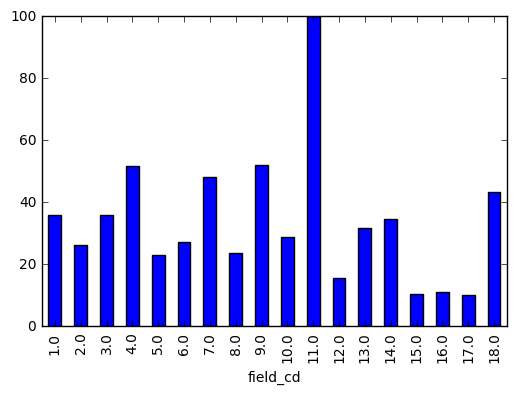

In [538]:
attrM['total']=attrM.apply(get_totalM,axis=1)
attrM['%']=attrM['size']/attrM['total']*100
x=attrM[attrM.attr>=8].groupby("field_cd").sum()
x['%'].plot(kind='bar')
# We cannot use total in x because total will be bigger than the real normal, however, % and size is right

### We can see that male from field number 11- social work, have the highest percent of meeting good looking people participating in speed dating. 

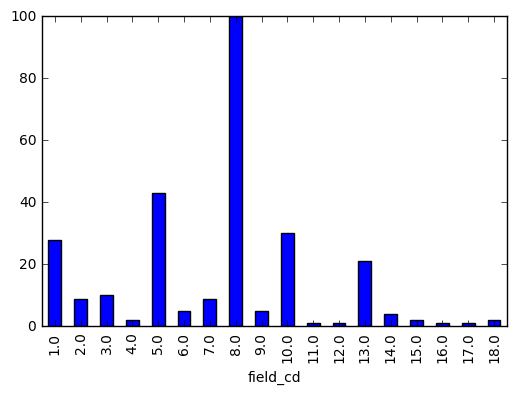

In [546]:
field=data[data.gender==1].groupby(['iid','field_cd']).size()
field=field.reset_index()
field.groupby('field_cd').size().plot(kind='bar')

### We can see that there are a lot of male from field 8- Business participating speed dating. However, comparing two graphs, we can see that fields having less participants have higher chance of meeting attractive dates than fields having a lot of participants.

## Female:

In [424]:
attrF=data[(data.gender==0) & (data.attr>=8)].groupby(['field_cd','attr']).size()
attrF=attrF.reset_index()
attrF['size']=attrF[0]
attrF=attrF.drop(0,1)
#attrF.head()

In [548]:
def get_totalF(row):
    total=data[data.gender==0].groupby(['field_cd']).size()
    total.tolist()
    return total[row['field_cd']]
#calculate the total number of date that people in field X meet

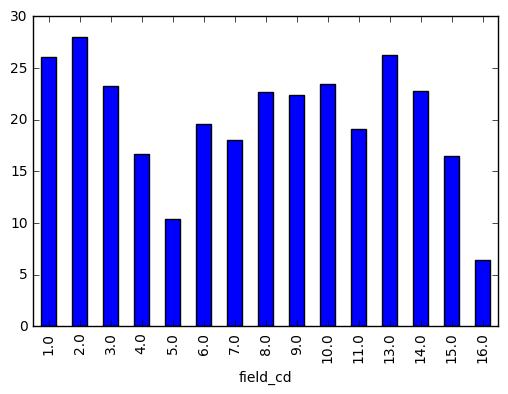

In [426]:
attrF['total']=attrF.apply(get_totalF,axis=1)
attrF['%']=attrF['size']/attrF['total']*100
x=attrF.groupby("field_cd").sum()
x['%'].plot(kind='bar')

### We can see that most of the fields have high percent of meeting attractive men, but field number 2, which is suprisingly, Math, has the highest percentage of attractive males.

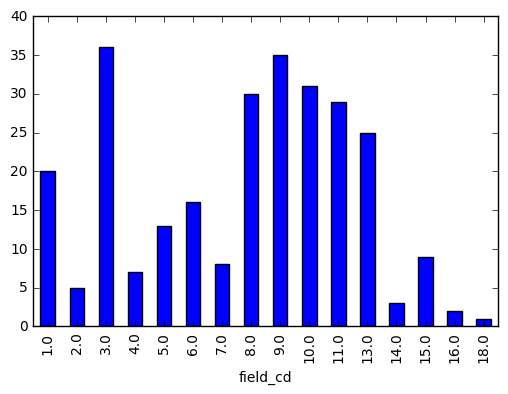

In [547]:
field=data[data.gender==0].groupby(['iid','field_cd']).size()
field=field.reset_index()
field.groupby('field_cd').size().plot(kind='bar')

### We can see that there are a lot of female from field 3- Social Work and field 9 - Education participating speed dating. The relationship between number of participants entering speed dating and the chance to meet attractive men is not as negative and obvious like male.

# Question 2: H"ow important apprearance is to the decision of dating a person again. How is it compared to the "inside value" like sincere?
To do this, at first, I want to make a scatter plot to see the distribution and the linear relationship. 

/usr/local/lib/python3.5/site-packages/numpy/linalg/linalg.py:1546: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


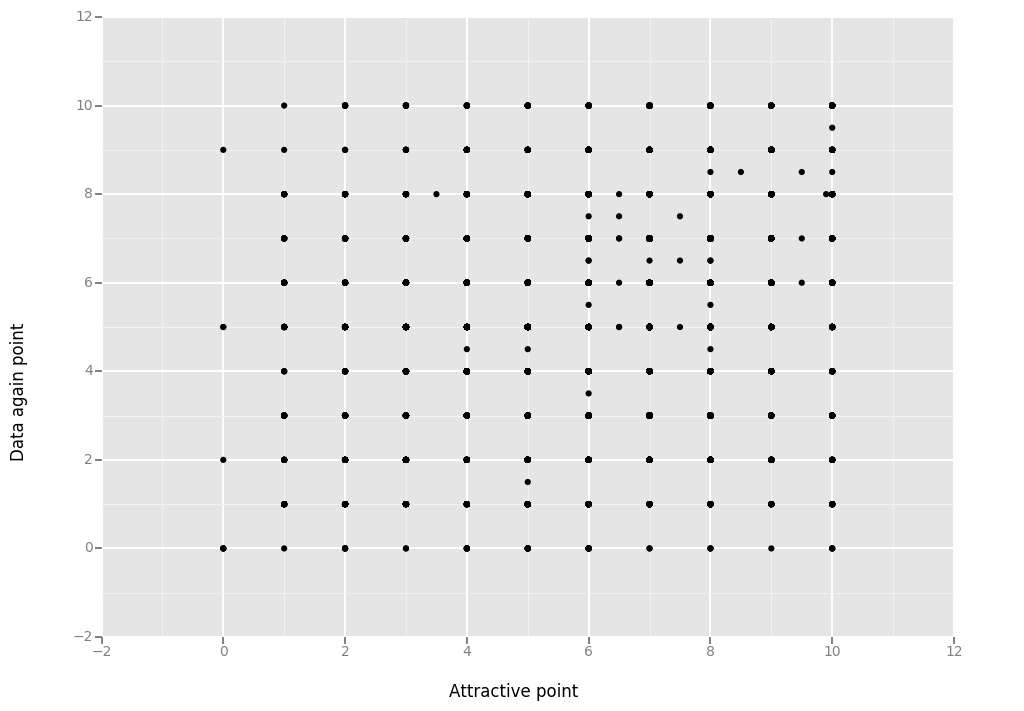

<ggplot: (8769663282657)>

In [429]:
ggplot(data,aes(x="attr",y="prob"))+geom_point()+stat_smooth(method="lm")+labs(x="Attractive point",y="Data again point")

### However, I realize that the point scale the data used making attributes like attractive or sincere are discrete variables, which are not the ideal variable for linear testing. So I tried out to see if I calculate things in percentage, would it make any differences. So, I will create a smaller dataset from the big one including attr, prob, and the percentage of each attr point.

In [437]:
attrPoint=data.groupby(['attr','prob']).size()
attrPoint=attrPoint.reset_index()
attrPoint['size']=attrPoint[0]
attrPoint.drop(0,1)
attrPoint.head()

,attr,prob,0,size
0,0.0,0.0,4,4
1,0.0,2.0,1,1
2,0.0,5.0,2,2
3,0.0,9.0,1,1
4,1.0,0.0,1,1


In [431]:
def get_totalPoint(row):
    total=data.groupby(['prob']).size()
    total.tolist()
    return total[row['prob']]
attrPoint['countPoint']=attrPoint.apply(get_totalPoint,axis=1)

In [432]:
attrPoint['%']=attrPoint['size']/attrPoint['countPoint']*100
attrPoint.head()

,attr,prob,0,size,countPoint,%
0,0.0,0.0,4,4,49,8.163265
1,0.0,2.0,1,1,539,0.185529
2,0.0,5.0,2,2,1799,0.111173
3,0.0,9.0,1,1,241,0.414938
4,1.0,0.0,1,1,49,2.040816


In [433]:
attrPointP=attrPoint[(attrPoint.prob>=6) & (attrPoint.attr<=5)].groupby('attr').sum()
attrPointP=attrPointP.reset_index()
attrPointP

,attr,prob,0,size,countPoint,%
0,0.0,9.0,1,1,241,0.414938
1,1.0,40.0,34,34,3606,4.127265
2,2.0,40.0,73,73,3606,11.343078
3,3.0,40.0,107,107,3606,15.760865
4,3.5,8.0,1,1,652,0.153374
5,4.0,40.0,229,229,3606,33.029777
6,5.0,40.0,408,408,3606,47.342854


#### We can see that the percentage does not add up to 100. This is because we calculated the percentage by dividing the number of people have a specific score on attractive and data again, divided by the total of number of people that have that date again point. When I use the sum function, it adds up the percentage of people have that specific points, therefore, the sum will go over. With this dataset, we only care about the attr and the percentage. The other one like prob and countPoint get sum up, which we do not need.

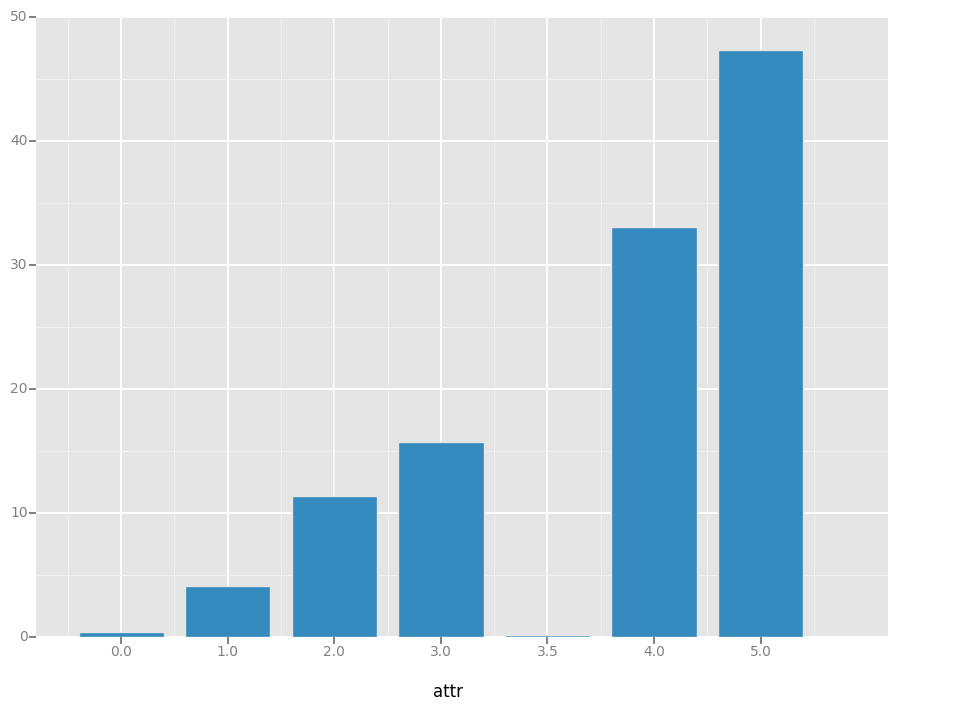

<ggplot: (8769663441086)>

In [434]:
ggplot(attrPointP,aes(x="attr",weight='%'))+geom_bar()

### So we still see that even in the group of people have low attractive point and high date again point, the people with higher attractive point stil have a higher chance to be dated again. Let move on and see if this change when we add the sincere attribute

In [669]:
asp=data[(data.attr<=3) & (data.sinc>=6)][['attr','sinc','prob']]
asp.fillna(0,inplace=True)
count=len(asp)
asp=asp.groupby(['prob']).size()
asp=asp.reset_index()
asp['percent']=asp[0]/count
asp

,prob,0,percent
0,0.0,12,0.026966
1,1.0,47,0.105618
2,2.0,53,0.119101
3,3.0,41,0.092135
4,4.0,42,0.094382
5,5.0,83,0.186517
6,6.0,64,0.143820
7,7.0,45,0.101124
8,8.0,37,0.083146
9,9.0,9,0.020225


In [632]:
from pylab import *

([<matplotlib.patches.Wedge at 0x7f9d8a6e3cc0>,
  <matplotlib.text.Text at 0x7f9d8a6af278>])

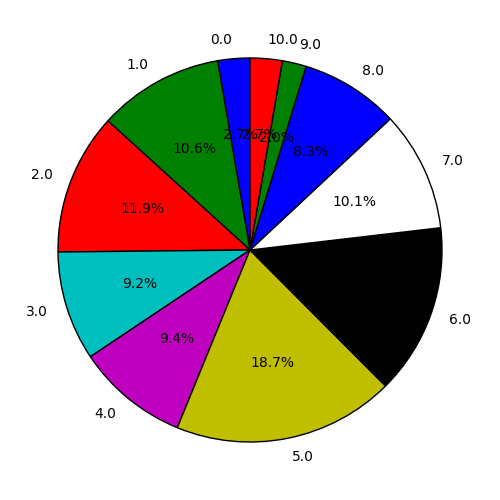

In [674]:
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
fracs = [15, 30, 45, 10]
explore=asp['percent'].tolist()
labels=asp['prob'].tolist()
pie(explore,labels=labels,autopct='%1.1f%%', shadow=False, startangle=90)

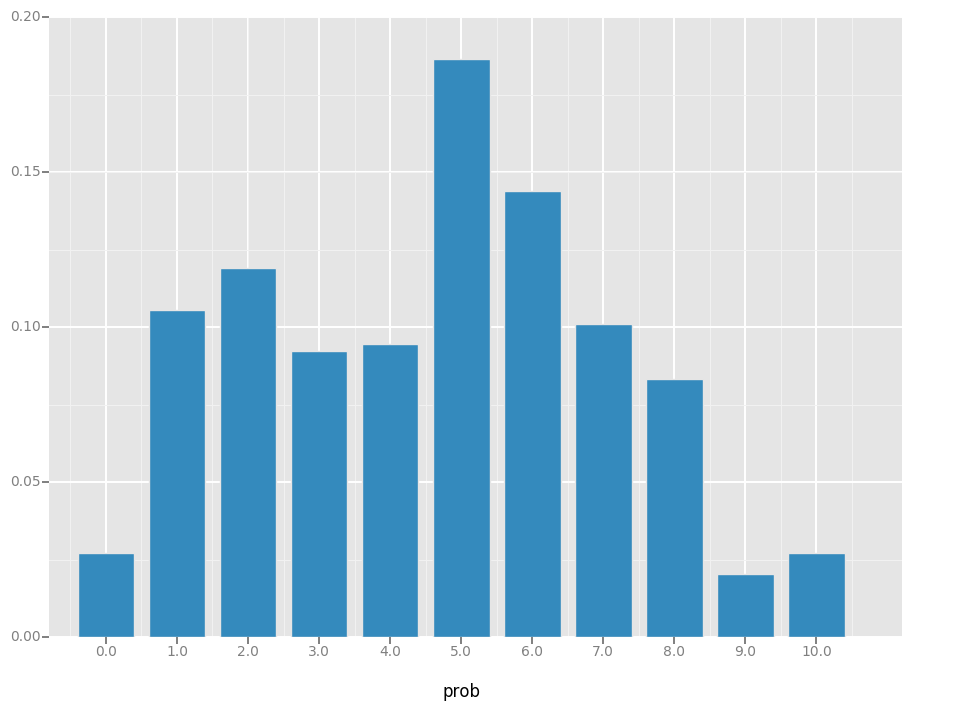

<ggplot: (-9223363267191198071)>

In [671]:
ggplot(asp,aes(x='prob',weight='percent'))+geom_bar()

### This is an interesting observation because it seems like people with high sincere points and low attractive points, the chance of getting dated again is quite random. Their dates seem to unsure if they would want to date them again, which is indicated by the most common point, 5 and 6. I believe that sincere have some impact on the decision because with the first observation, people with attractive points lower than 3 have less than 30% chance of being dated again.

# Question 3: What is the most desired attribute of a male, of a female?

In [556]:
def normalize_attr(row):
    if (row['wave']>=6) and (row['wave']<=9):
        return row['attr1_1']*10
    else:
        return row['attr1_1']
def normalize_sinc(row):
    if (row['wave']>=6) and (row['wave']<=9):
        return row['sinc1_1']*10
    else:
        return row['sinc1_1']
def normalize_intel(row):
    if (row['wave']>=6) and (row['wave']<=9):
        return row['intel1_1']*10
    else:
        return row['intel1_1']
def normalize_fun(row):
    if (row['wave']>=6) and (row['wave']<=9):
        return row['fun1_1']*10
    else:
        return row['fun1_1']
def normalize_amb(row):
    if (row['wave']>=6) and (row['wave']<=9):
        return row['amb1_1']*10
    else:
        return row['amb1_1']
def normalize_shar(row):
    if (row['wave']>=6) and (row['wave']<=9):
        return row['shar1_1']*10
    else:
        return row['shar1_1']

## Female
Each male will range their dates so to know what features is desirable of a female, we look at data from the male

In [620]:
desireF=data[data.gender==1][['iid','attr1_1','sinc1_1','fun1_1','intel1_1','amb1_1','shar1_1','wave']]
desireF.fillna(0,inplace=True)
desireF['normAttr']=desireF.apply(normalize_attr,axis=1)
desireF['normSinc']=desireF.apply(normalize_sinc,axis=1)
desireF['normIntel']=desireF.apply(normalize_intel,axis=1)
desireF['normFun']=desireF.apply(normalize_fun,axis=1)
desireF['normAmb']=desireF.apply(normalize_amb,axis=1)
desireF['normShar']=desireF.apply(normalize_shar,axis=1)
desireF=desireF[['normAttr','normSinc','normIntel','normFun','normAmb','normShar','iid']]
desireF=desireF.groupby('iid').mean()
#Because each guy meets 10 girls but he has the same standard for girls
medianF=desireF.median()
meanF=desireF.mean()

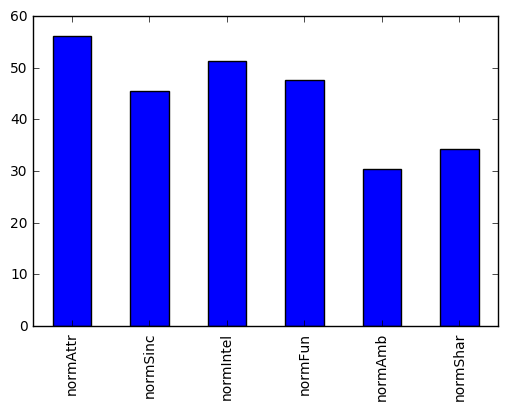

In [621]:
meanF.plot(kind='bar')

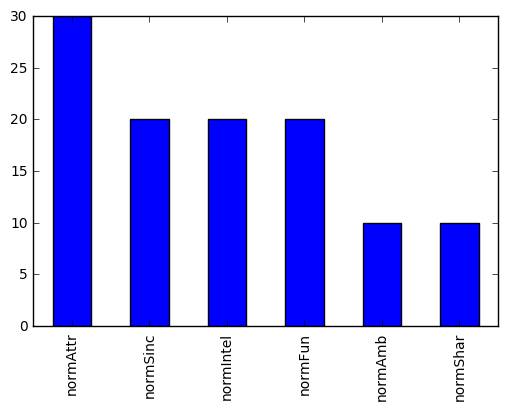

In [622]:
medianF.plot(kind='bar')

### In conclusion: Male really care about appearance of female, other attributes like sincere, intelligent or fun are not as important. Ambitious and Shared hobbies are the least popular female attribute to male.

# Male:

In [678]:
desireM=data[data.gender==0][['iid','attr1_1','sinc1_1','fun1_1','intel1_1','amb1_1','shar1_1','wave']]
desireM.fillna(0,inplace=True)
desireM['normAttr']=desireM.apply(normalize_attr,axis=1)
desireM['normSinc']=desireM.apply(normalize_sinc,axis=1)
desireM['normIntel']=desireM.apply(normalize_intel,axis=1)
desireM['normFun']=desireM.apply(normalize_fun,axis=1)
desireM['normAmb']=desireM.apply(normalize_amb,axis=1)
desireM['normShar']=desireM.apply(normalize_shar,axis=1)
desireM=desireM[['normAttr','normSinc','normIntel','normFun','normAmb','normShar','iid']]
desireM=desireM.groupby('iid').mean()
#Because each guy meets 10 girls but he has the same standard for girls
median=desireM.median()
mean=desireM.mean()

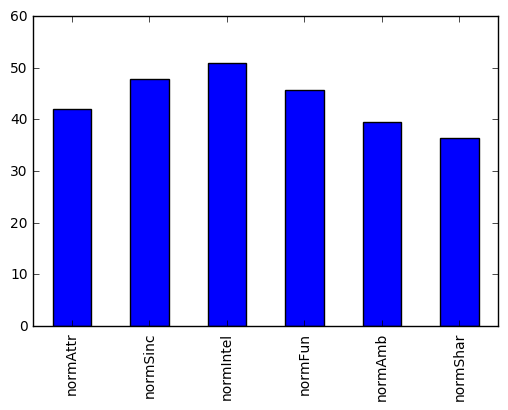

In [679]:
mean.plot(kind='bar')

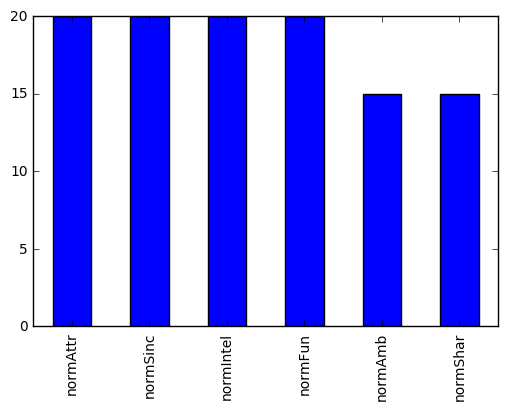

In [680]:
median.plot(kind='bar')

### Conclusion: Female care more about well-rounded male with all attribute. They also care more about the "inside values" such as intellectual, fun, and sincere than appearance. 

* Note: It is also interesting to see that shared hobbies/interests does not play that significant of a roles when it comes to the decision of dating someone again.